This is code is largely adapted from Chapter 2 and 8 of the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

The first picture in the test set is:


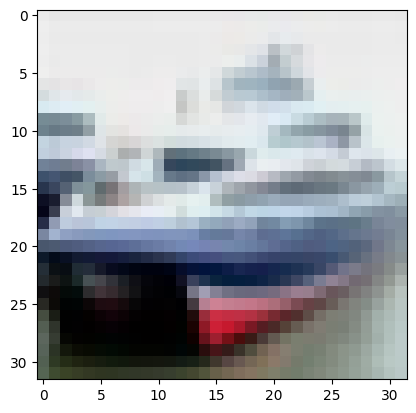

The picture seems to be of a ship
The picture is blur as the original picture is only 32 pixels width and height


In [2]:
pic = x_test[1]
print("The first picture in the test set is:")
plt.imshow(pic)
plt.show()
print("The picture seems to be of a ship")
print("The picture is blur as the original picture is only 32 pixels width and height")

### About the Data

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [2]:
len(x_train)

50000

In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
len(x_test)

10000

## Network Architecture

In [9]:
model = keras.Sequential(
    [layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")]
)

ReLU is a popular activation function that introduces non-linearity to the model and  Softmax is typically used in multi-class classification problems to convert the raw output scores into class probabilities

The code creates a neural network model with two dense layers: one hidden layer with 512 units and ReLU activation, and one output layer with 10 units and softmax activation

In [21]:
# preparing the data
train_images = x_train.reshape((50000, 32, 32, 3))
train_images = x_train.astype("float32") / 255
test_images = x_test.reshape((10000, 32, 32, 3))
test_images = x_test.astype("float32") / 255

# training the model on our dataset and validating it with test set to check for overfitting or under
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [23]:
# fitting the model
model.fit(train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 33s 71ms/step - loss: 1.7379 - accuracy: 0.3753
Epoch 2/10
391/391 [==============================] - 34s 86ms/step - loss: 1.3718 - accuracy: 0.5143
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 1.1896 - accuracy: 0.5827
Epoch 4/10
391/391 [==============================] - 31s 79ms/step - loss: 1.0693 - accuracy: 0.6289
Epoch 5/10
391/391 [==============================] - 31s 80ms/step - loss: 0.9716 - accuracy: 0.6650
Epoch 6/10
391/391 [==============================] - 33s 84ms/step - loss: 0.8954 - accuracy: 0.6900
Epoch 7/10
391/391 [==============================] - 45s 115ms/step - loss: 0.8335 - accuracy: 0.7127
Epoch 8/10
391/391 [==============================] - 41s 104ms/step - loss: 0.7793 - accuracy: 0.7328
Epoch 9/10
391/391 [==============================] - 35s 90ms/step - loss: 0.7298 - accuracy: 0.7481
Epoch 10/10
391/391 [==============================] - 34s 88ms/step - loss: 0.6

The optimizer argument specifies the optimization algorithm used to update the model's weights based on the gradients of the loss function. In this case, "rmsprop" stands for Root Mean Square Propagation, which is an adaptive learning rate optimization algorithm commonly used in neural networks

The loss argument specifies the loss function used during training. The loss function measures how well the model's predictions match the true labels. "Sparse Categorical Crossentropy" is used when dealing with integer labels (not one-hot encoded). It is typically used for multi-class classification problems where each sample belongs to a single class.

The metrics argument is a list of metrics used to evaluate the model's performance during training and testing. In this case, the metric used is "accuracy," which is a common metric for classification tasks. It measures the proportion of correctly classified samples to the total number of samples.

The code builds a series of convolutional and pooling layers to extract relevant features from the input images.

Added a flatten layer to the model, which transforms the 3D output from the previous convolutional and pooling layers into a 1D vector. This prepares the data for the subsequent fully connected (dense) layers

In [24]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         7385

In [25]:
# Testing the accuracy

test_loss, test_acc = model.evaluate(test_images, y_test)
print(f"The Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.9046 - accuracy: 0.6997
The Test accuracy: 0.700


In [26]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[1]

1/1 [==============================] - 0s 241ms/step


array([3.5142540e-03, 8.5100689e-04, 5.3913419e-07, 3.9374666e-07,
       5.4120608e-07, 2.5177518e-09, 5.7195165e-10, 4.2846722e-08,
       9.9561369e-01, 1.9422958e-05], dtype=float32)

#### Adding another layer to see if it increases the accuracy of the model

In [31]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [32]:
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(train_images, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 28ms/step - loss: 1.5299 - accuracy: 0.4462
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1094 - accuracy: 0.6123
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9256 - accuracy: 0.6783
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8124 - accuracy: 0.7184
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7166 - accuracy: 0.7519
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6424 - accuracy: 0.7788
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.5810 - accuracy: 0.7999
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.5268 - accuracy: 0.8186
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4870 - accuracy: 0.8349
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [33]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         7385

In [35]:
test_loss, test_acc = model.evaluate(test_images, y_test)
print(f"The Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 4s 11ms/step - loss: 1.1481 - accuracy: 0.6909
The Test accuracy: 0.691
